In [ ]:
#this program uses an artificial recurrent neural network called Long Short Term Memory (LSTM)
#we will use LSTM to predict the closing stock price of a coproration using the past 60 day stock price

In [1]:
!pip install --upgrade pandas-datareader
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
#get stock quote
df = web.DataReader('CDW', data_source='yahoo', start='2012-01-01', end='2022-09-20')

#show data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2013-06-27,18.750000,17.379999,17.639999,18.370001,8285800.0,16.751802
2013-06-28,19.170000,18.379999,18.400000,18.620001,717400.0,16.979778
2013-07-01,18.900000,18.340000,18.650000,18.340000,394200.0,16.724445
2013-07-02,19.639999,18.260000,18.340000,19.219999,223800.0,17.526928
2013-07-03,19.209999,18.670000,18.990000,19.080000,103700.0,17.399252
...,...,...,...,...,...,...
2022-09-14,173.919998,170.300003,172.770004,172.039993,616900.0,172.039993
2022-09-15,172.729996,169.130005,171.880005,169.679993,468900.0,169.679993
2022-09-16,171.509995,166.809998,168.690002,170.830002,1267500.0,170.830002


In [6]:
#get number of rows and columns in data set
df.shape

(2325, 6)

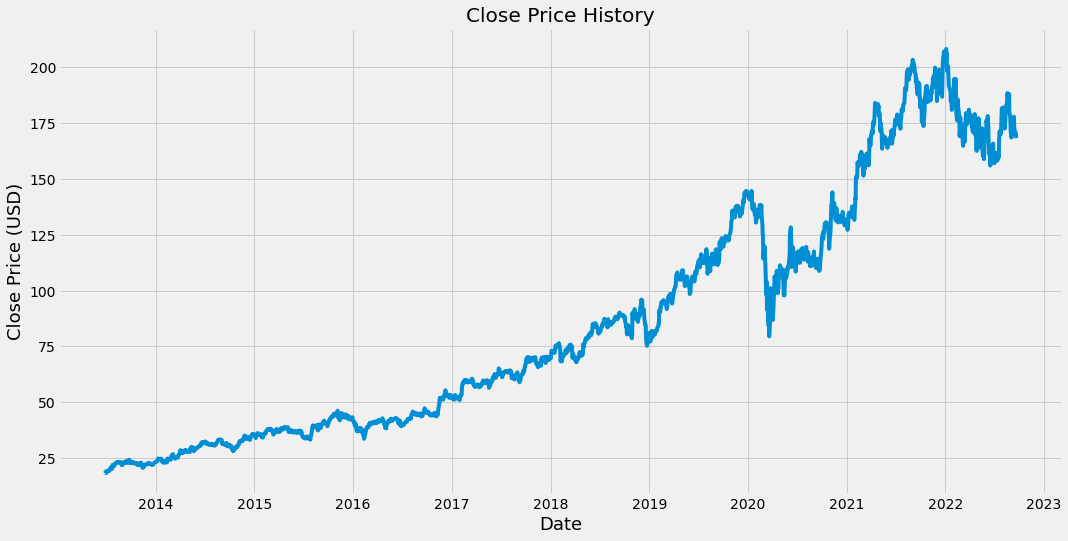

In [8]:
#visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price (USD)', fontsize=18)
plt.show()

In [9]:
#create a new dataframe with only the 'Close' column
data = df.filter(['Close'])

#convert dataframe to a numpy array
dataset = data.values

#get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * 0.8)

training_data_len


1860

In [11]:
#scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[1.58073059e-04],
       [1.47531840e-03],
       [0.00000000e+00],
       ...,
       [8.03466979e-01],
       [8.02676583e-01],
       [7.89872997e-01]])

In [12]:
#create the training data set

#create the scaled training data set
train_data = scaled_data[0:training_data_len, :]

#split data into x_train and y_train data sets
x_train = []
y_train = []
for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 60:
    print(x_train)
    print(y_train)
    print()

[array([0.00015807, 0.00147532, 0.        , 0.0046367 , 0.00389905,
       0.0046367 , 0.00468939, 0.00611202, 0.00400443, 0.00653354,
       0.00616471, 0.00642815, 0.00927341, 0.01069604, 0.01311976,
       0.01317245, 0.01053796, 0.00990568, 0.01174983, 0.01917909,
       0.01712419, 0.01770378, 0.01717688, 0.01664998, 0.01749302,
       0.02155013, 0.02344697, 0.02355234, 0.02429001, 0.02492228,
       0.0248169 , 0.02539649, 0.02666104, 0.02645029, 0.02455345,
       0.0248169 , 0.02502766, 0.02513304, 0.02471153, 0.02460614,
       0.02597608, 0.02444807, 0.02044364, 0.01917909, 0.01970599,
       0.01891564, 0.02207703, 0.02460614, 0.02623952, 0.02581801,
       0.02434269, 0.02471153, 0.02676642, 0.02502766, 0.02718794,
       0.02913747, 0.02576532, 0.02871595, 0.02697718, 0.02397386])]
[0.029084779599484342]



In [13]:
#convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [15]:
#reshape the x_train data set
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1800, 60, 1)

In [19]:
#build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [20]:
#compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [21]:
#train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1800/1800 [==============================] - 55s 29ms/step - loss: 9.2511e-04


In [23]:
#create the testing data set

#create a new array containing scaled values
test_data = scaled_data[training_data_len - 60: , :]

#create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len: , :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [24]:
#convert the data to a numpy array
x_test = np.array(x_test)

In [25]:
#reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [26]:
#get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [29]:
#get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test) **2)
rmse #4.2745

4.274542728547127

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


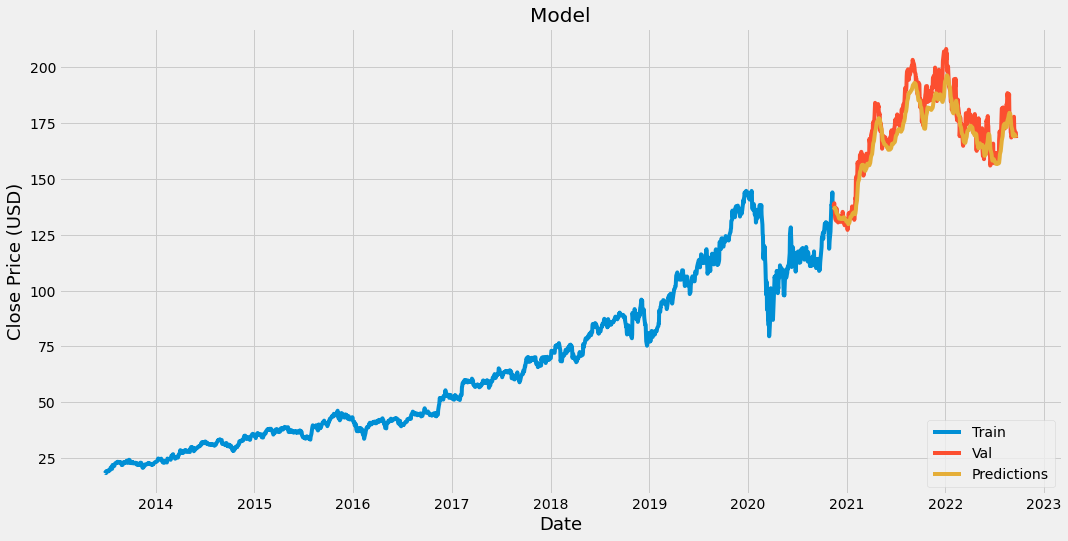

In [28]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

#visualize the model
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price (USD)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [30]:
#show the valid and predicted prices
valid

,Close,Predictions
Date,,
2020-11-13,137.589996,136.065628
2020-11-16,139.080002,136.498016
2020-11-17,136.779999,136.952621
2020-11-18,135.729996,137.106323
2020-11-19,132.779999,137.000839
...,...,...
2022-09-14,172.039993,169.928055
2022-09-15,169.679993,169.798096
2022-09-16,170.830002,169.327560


In [35]:
#predict closing price for future
from datetime import date

today = date.today()

#get the quote
cdw_quote = web.DataReader('CDW', data_source='yahoo', start='2021-01-01', end=today)

#create new dataframe
new_df = cdw_quote.filter(['Close'])

#get last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values

#scaled the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)

#create list
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)

#reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

#get the predicted scaled price
pred_price = model.predict(X_test)

#undo scaling
pred_price = scaler.inverse_transform(pred_price)

print(pred_price)

[[161.06107]]
